In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
dataset = pd.read_csv("titanic_eda/train.csv")

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
dataset["Sex"] = le.fit_transform(dataset["Sex"])

In [5]:
dataset["Embarked"] = le.fit_transform(dataset["Embarked"].astype(str))

In [6]:
dataset["Age"] = np.where(dataset["Age"].isnull(),28,dataset["Age"])

In [7]:
y = dataset["Pclass"]

In [8]:
X = dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [9]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
lstColumnNames = list(["Survived","Pclass","Sex","SibSp","Parch","Embarked"])

In [11]:
def SplitData(Xdataset, sColumnName):
    y = Xdataset[sColumnName]
    Xdataset = Xdataset.drop([sColumnName],axis=1)
    return train_test_split(Xdataset,y,test_size=0.3,random_state=0)

def InitialiseSVM():
    return svm.SVC(gamma=0.01, C=100)

def FitSVMClassifier(x_train,y_train):
    clf = InitialiseSVM()
    return clf.fit(x_train,y_train)

def PredictUsingSVM(x_train,x_test,y_train):
    clf = FitSVMClassifier(x_train,y_train)
    return clf.predict(x_test)

def FindConfusionMatrixAndAccuracy(Xdataset, sColumnName):
    X_train,X_test,y_train,y_test = SplitData(Xdataset, sColumnName) 
    y_pred = PredictUsingSVM(X_train,X_test,y_train)
    print("Dependent Variable:", sColumnName)
    print("Accuracy")
    acc = accuracy_score(y_test,y_pred,normalize=True) 
    print(acc, "\n")
    print("Confusion matrix")
    print(confusion_matrix(y_test,y_pred))
    return acc

def PlotConfusionMatrix(Xdataset, sColumnName):
    X_train,X_test,y_train,y_test = SplitData(Xdataset, sColumnName) 
    y_pred = PredictUsingSVM(X_train,X_test,y_train)
    print("Dependent Variable:", sColumnName)
    print("Accuracy")
    print(accuracy_score(y_test,y_pred,normalize=True), "\n")
    plot_confusion_matrix(FitSVMClassifier(X_train,y_train),  
                          X_test, 
                          y_test)
    return plt.show()

In [12]:
Accuracy = []

In [13]:
print("Printing confusion matrix\n")
for sColumnName in lstColumnNames:
    Accuracy.append(FindConfusionMatrixAndAccuracy(X,sColumnName))
    print("\n")
print("Maximum Accuracy:", max(Accuracy), "for Dependent variable=", lstColumnNames[Accuracy.index(max(Accuracy))], "\n")

Printing confusion matrix

Dependent Variable: Survived
Accuracy
0.7649253731343284 

Confusion matrix
[[139  29]
 [ 34  66]]


Dependent Variable: Pclass
Accuracy
0.8880597014925373 

Confusion matrix
[[ 57   3   0]
 [  7  39   6]
 [  3  11 142]]


Dependent Variable: Sex
Accuracy
0.7425373134328358 

Confusion matrix
[[ 58  41]
 [ 28 141]]


Dependent Variable: SibSp
Accuracy
0.7425373134328358 

Confusion matrix
[[159  20   2   0   0   0]
 [ 31  31   3   0   0   0]
 [  1   3   1   2   0   0]
 [  1   2   0   3   0   0]
 [  2   2   0   0   3   0]
 [  0   0   0   0   0   2]]


Dependent Variable: Parch
Accuracy
0.8283582089552238 

Confusion matrix
[[193   5   6   0   0   0]
 [ 21  17   1   1   0   0]
 [  6   3  12   0   0   0]
 [  0   0   0   0   0   0]
 [  0   1   1   0   0   0]
 [  0   1   0   0   0   0]]


Dependent Variable: Embarked
Accuracy
0.75 

Confusion matrix
[[ 24   3  32   1]
 [  1   8  12   0]
 [ 14   4 169   0]
 [  0   0   0   0]]


Maximum Accuracy: 0.8880597014925373 

Plotting confusion matrix

Dependent Variable: Survived
Accuracy
0.7649253731343284 



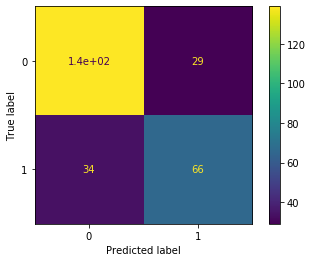

Dependent Variable: Pclass
Accuracy
0.8880597014925373 



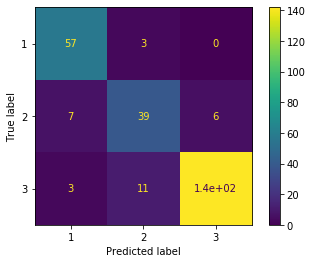

Dependent Variable: Sex
Accuracy
0.7425373134328358 



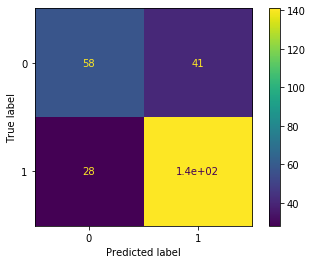

Dependent Variable: SibSp
Accuracy
0.7425373134328358 



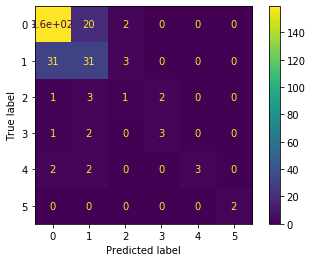

Dependent Variable: Parch
Accuracy
0.8283582089552238 



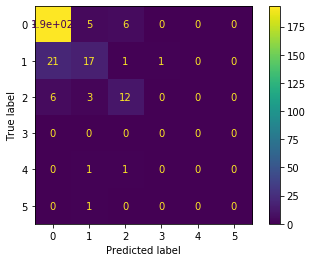

Dependent Variable: Embarked
Accuracy
0.75 



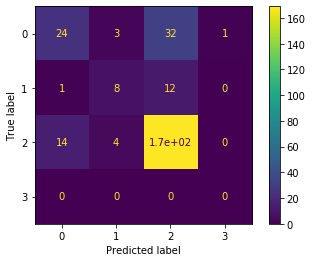

In [14]:
print("Plotting confusion matrix\n")
for sColumnName in lstColumnNames:
    PlotConfusionMatrix(X,sColumnName)